<a href="https://colab.research.google.com/github/themysterysolver/QR-CIP/blob/main/CODE/QR_MODULE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qrcode

In [ ]:
!pip install opencv-python

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import random
import cv2
from google.colab.patches import cv2_imshow
import qrcode

random.seed(404)

(16, 100, 100)
(400, 400)


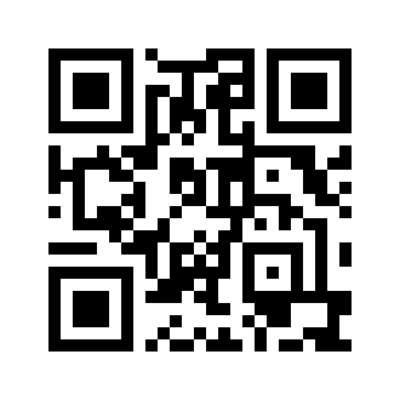

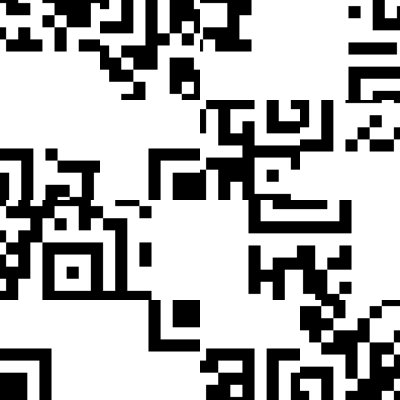

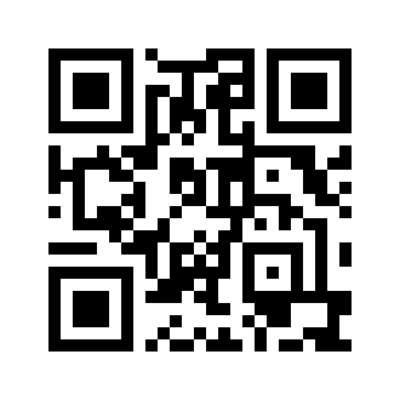

In [17]:
def divide_qr(path):
  divided_grid=[]
  img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  if img is None:
    print('ERROR: IMAGE NOT FOUND')
    return
  if img.shape[0]%4!=0 or img.shape[1]%4!=0:
    img=cv2.resize(img,(400,400))
  small_grid_size=img.shape[0]//4
  for i in range(4):
    for j in range(4):
      small_grid=img[i*small_grid_size:(i+1)*small_grid_size,j*small_grid_size:(j+1)*small_grid_size]
      divided_grid.append(small_grid)
  return np.array(divided_grid)

def generate_matrix():
  return

def scramble_qr(divided_blocks,permutation):
  scrambled_blocks=divided_blocks[permutation]
  return scrambled_blocks

def descramble_qr(scramble_qr,permuatation):
  inverse_permutation=np.argsort(permutation)
  descrambled_blocks=scramble_qr[inverse_permutation]
  return descrambled_blocks

def rebuild_matrix(to_rebuild_matrix):
  rows=[]
  for i in range(4):
    rows.append(np.hstack(to_rebuild_matrix[i*4:(i+1)*4]))
  return np.vstack(rows)

def display_mat_QR(mat):
  mat=mat.astype(np.uint8)
  cv2_imshow(mat)
  return

def permute(seed_string):# should be modified to include the logic of LSS
  permutation=random.sample(range(0,16),16)
  return permutation

if __name__=="__main__":
  #Initialisation
  seed_string=""
  permutation=permute(seed_string)

  my_string="AOT is a masterpiece!"
  qr=qrcode.make(my_string)

  qr.save('qr.png')
  path="/content/qr.png"
  #img=cv2.imread(path)

  img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  if img.shape[0]%4!=0 or img.shape[1]%4!=0:
    img=cv2.resize(img,(400,400))

  size=img.shape[0]

  #Dividing
  divided_blocks=divide_qr(path)
  print(divided_blocks.shape)

  #Merging
  orginal_img=rebuild_matrix(divided_blocks)
  print(orginal_img.shape)

  #Displaying
  display_mat_QR(orginal_img)

  #Scramble the blocks
  scrambled_blocks=scramble_qr(divided_blocks,permutation)
  merged_scramble_img=rebuild_matrix(scrambled_blocks)
  display_mat_QR(merged_scramble_img)

  #Descramble the blocks
  descrambled_blocks=descramble_qr(scrambled_blocks,permutation)
  merged_descrambled_img=rebuild_matrix(descrambled_blocks)
  display_mat_QR(merged_descrambled_img)
